# Fourier Transform Research

In [1]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
orig = pd.read_parquet("../../data/processed/train_enhanced.parquet")

In [4]:
orig

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales,...,Day,Day_of_Week,Month_Name,Month,Year,Quarter,Week,Week_of_Month,Is_Weekend,cluster
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,...,1,0,January,1,2018,1,1,1,0,3
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,...,1,0,January,1,2018,1,1,1,0,2
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,...,1,0,January,1,2018,1,1,1,0,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,...,1,0,January,1,2018,1,1,1,0,4
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,...,1,0,January,1,2018,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,1,51,37272.00,...,31,4,May,5,2019,2,22,5,0,4
188336,T1188337,153,S4,L2,R1,2019-05-31,1,0,90,54572.64,...,31,4,May,5,2019,2,22,5,0,2
188337,T1188338,154,S1,L3,R2,2019-05-31,1,0,56,31624.56,...,31,4,May,5,2019,2,22,5,0,3
188338,T1188339,155,S3,L1,R2,2019-05-31,1,1,70,49162.41,...,31,4,May,5,2019,2,22,5,0,1


In [5]:
def extract_dominant_frequencies(sales, time_interval=1):
    # Apply Fourier Transform
    fft_result = fft(sales)
    frequencies = fftfreq(len(sales), d=time_interval)
    amplitude = np.abs(fft_result)
    
    # Filter for positive frequencies
    positive_freq = frequencies[frequencies > 0]
    positive_amplitude = amplitude[frequencies > 0]
    
    # Find the dominant frequency
    dominant_idx = np.argmax(positive_amplitude)
    dominant_frequency = positive_freq[dominant_idx]
    dominant_amplitude = positive_amplitude[dominant_idx]
    
    return dominant_frequency, dominant_amplitude

In [6]:
results = []

# Extract frequencies for each store
for store in orig['Store_id'].unique():
    sales = orig[orig['Store_id'] == store]['Sales'].values
    dom_freq, dom_amp = extract_dominant_frequencies(sales)
    results.append({
        "Store_id": store,
        "dominant_frequency": dom_freq,
        "dominant_period_days": 1 / dom_freq,  # Period in days
        "dominant_amplitude": dom_amp
    })

In [13]:
pd.DataFrame(results).sort_values(by="dominant_period_days", ascending=False)

,Store_id,dominant_frequency,dominant_period_days,dominant_amplitude
360,359,0.001938,516.000000,9.086279e+05
154,296,0.001938,516.000000,1.232358e+06
247,65,0.001938,516.000000,4.068261e+06
41,265,0.001938,516.000000,1.449217e+06
18,237,0.001938,516.000000,7.515513e+05
...,...,...,...,...
301,181,0.339147,2.948571,1.534196e+06
74,226,0.339147,2.948571,8.007357e+05
314,127,0.339147,2.948571,1.522090e+06
59,198,0.339147,2.948571,1.991927e+06


In [33]:
s=orig[orig['Store_id'] == 263]['Sales']

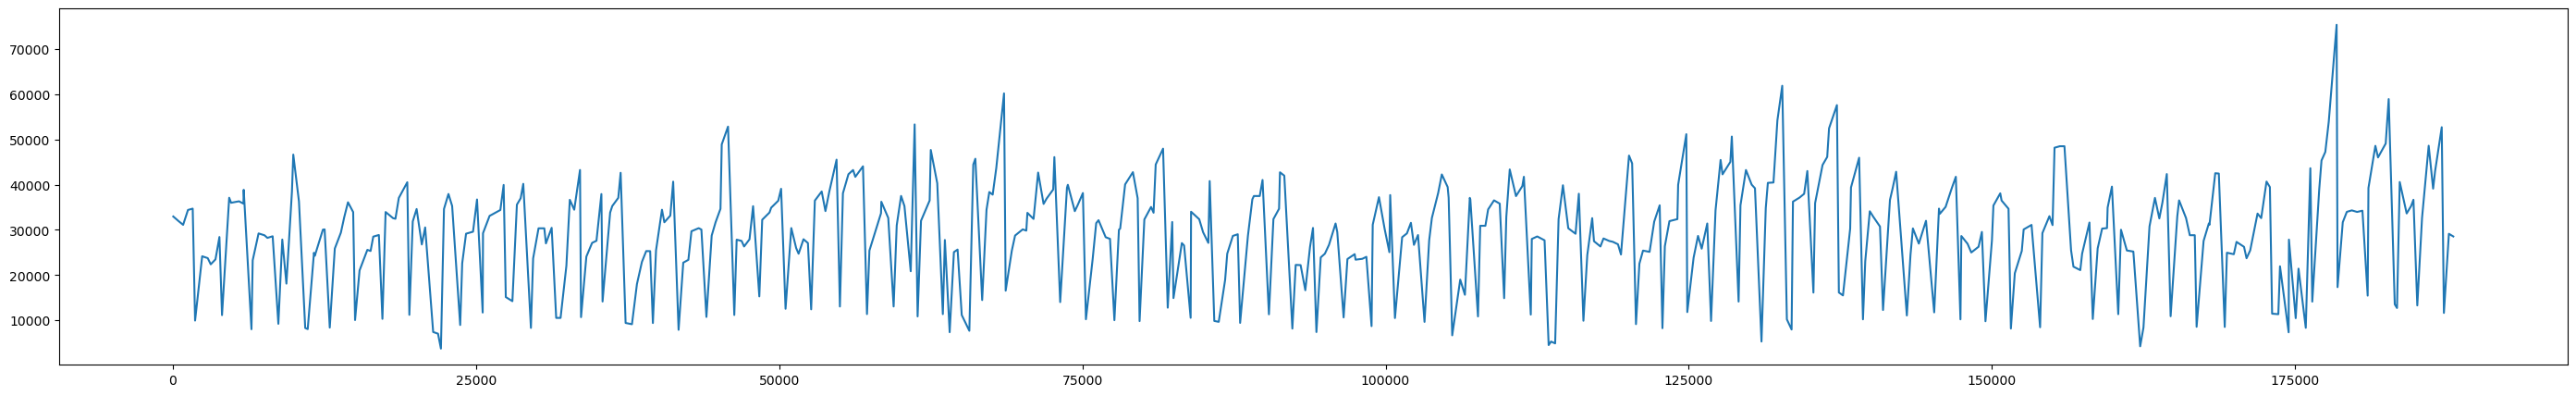

In [34]:
s.plot(figsize=(35, 5));

In [35]:
fft_result = fft(s)

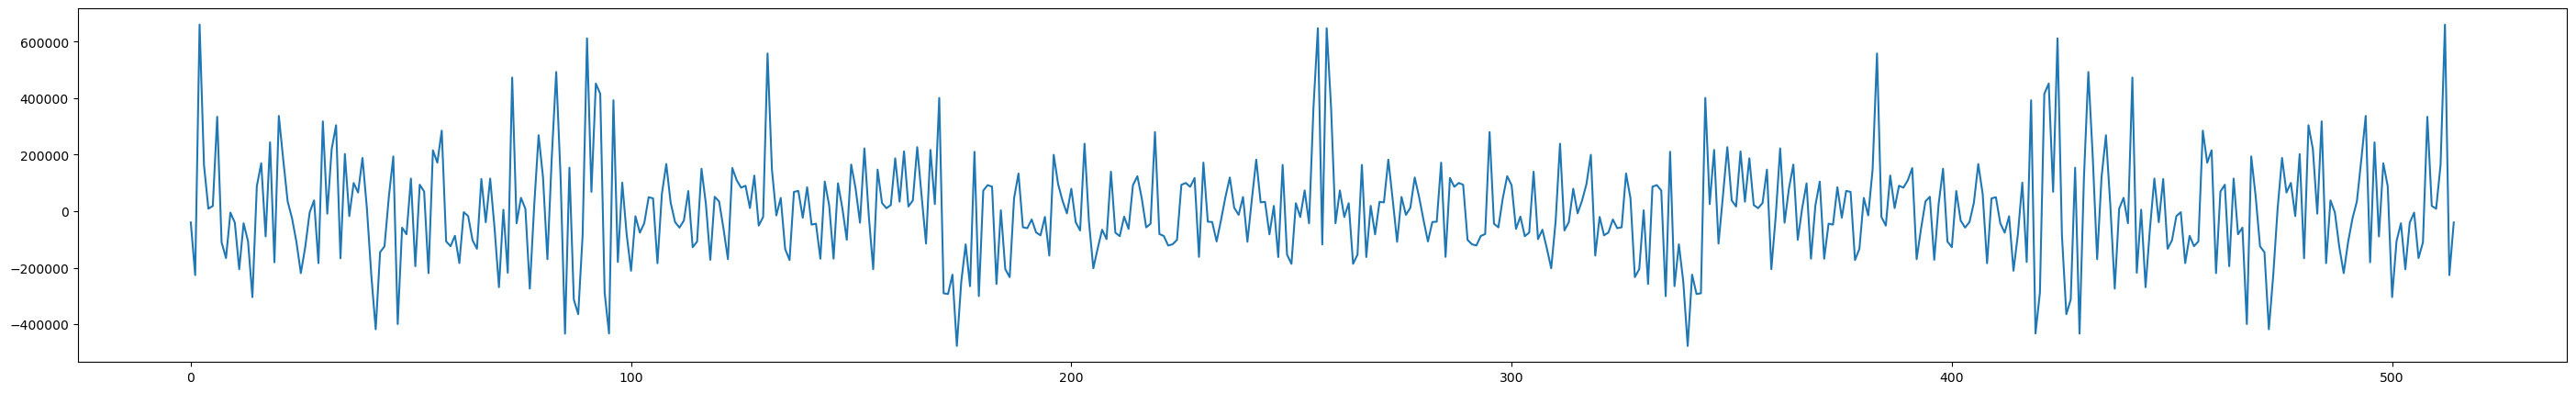

In [38]:
plt.figure(figsize=(35, 5))
plt.plot(fft_result[1:]);

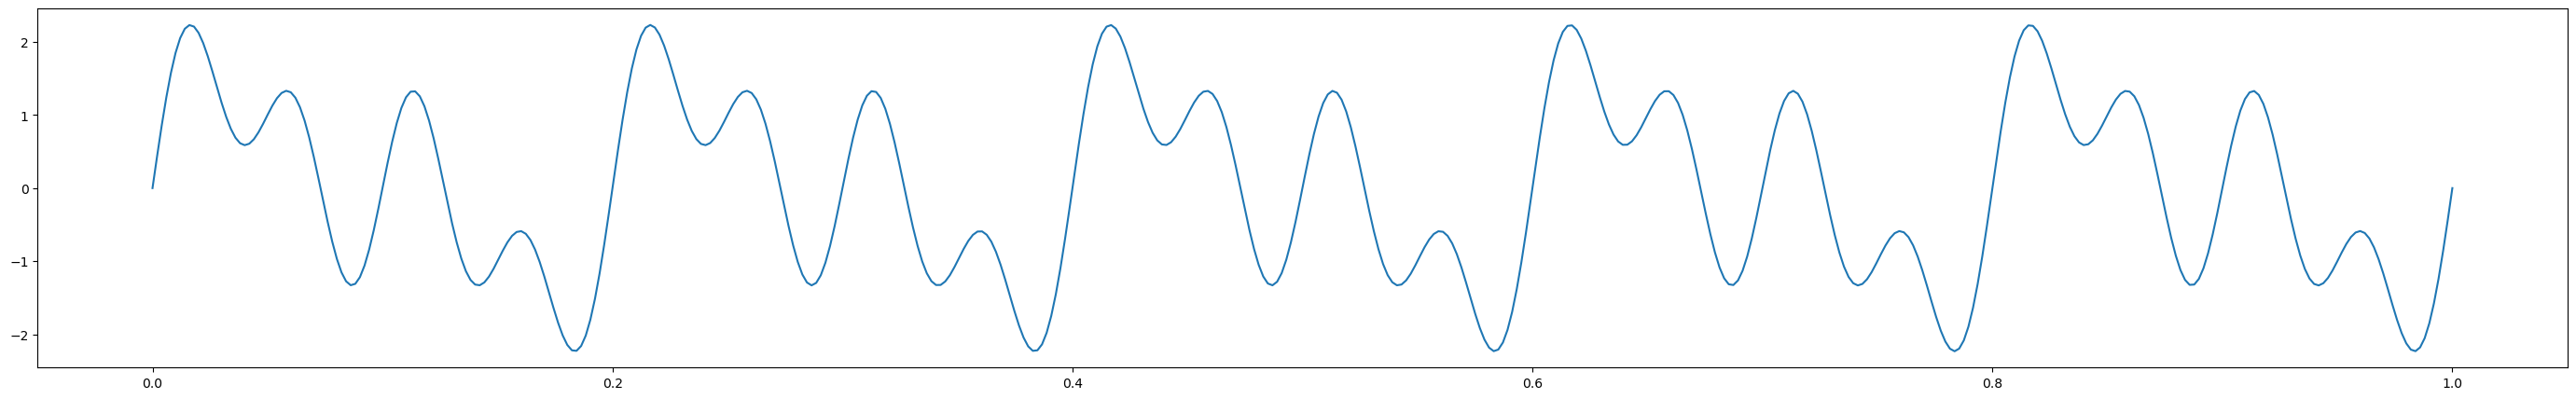

In [2]:
# sine wave
t = np.linspace(0, 1, 500)
sine_wave = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)

plt.figure(figsize=(35, 5))
plt.plot(t, sine_wave);

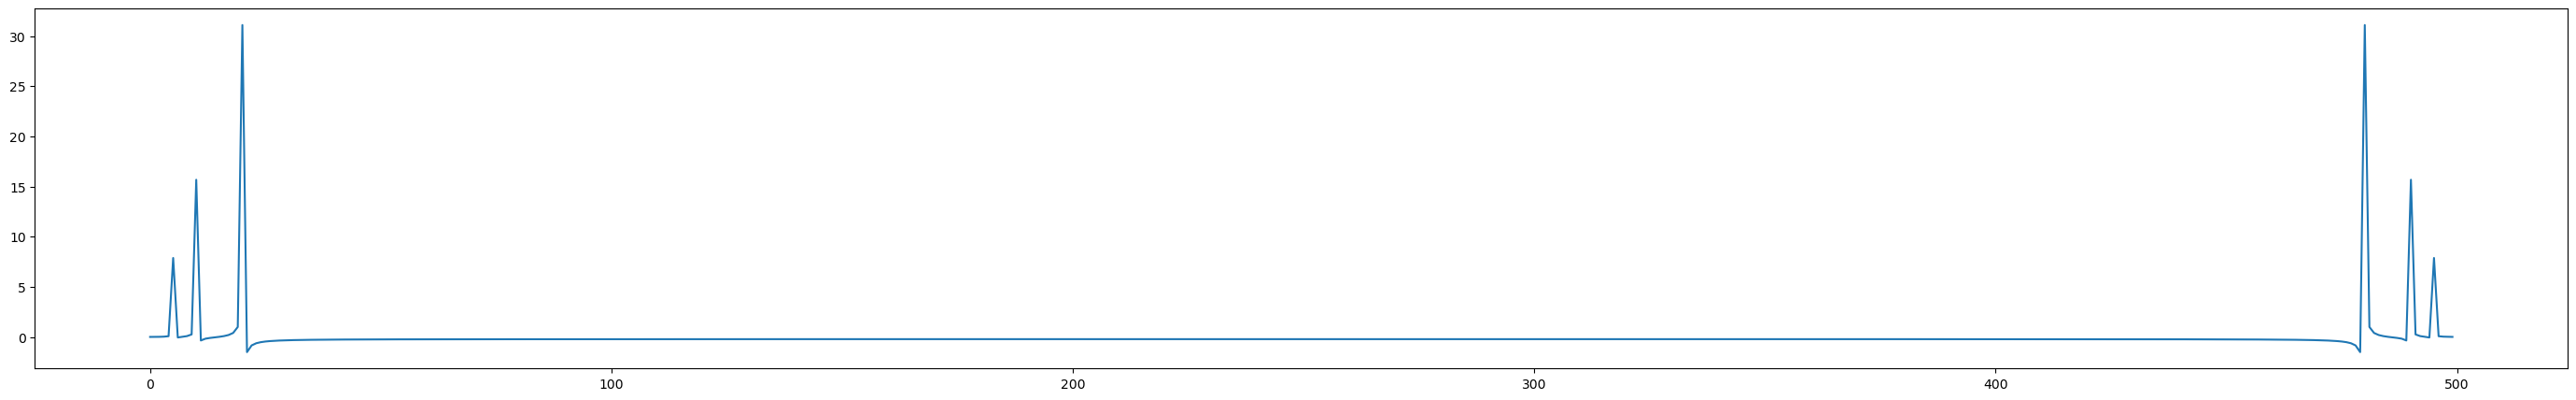

In [44]:
fft_result = fft(sine_wave)

plt.figure(figsize=(35, 5))
plt.plot(fft_result);

In [45]:

# Example time series data
time = np.linspace(0, 100, 500)  # 500 evenly spaced time points
signal = np.sin(2 * np.pi * time / 20) + np.random.normal(0, 0.5, len(time))  # Periodic + noise

# Compute the FFT
fft_values = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=(time[1] - time[0]))  # Frequency axis


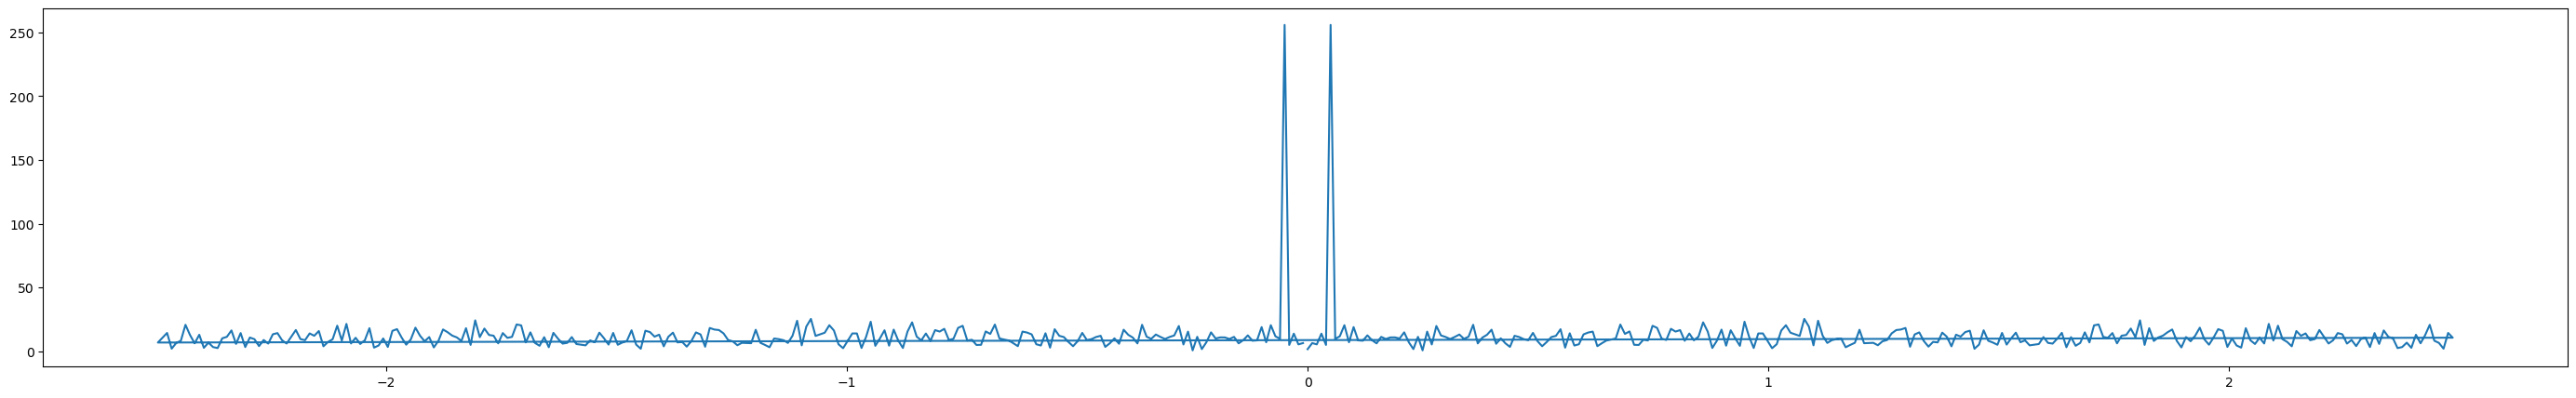

In [47]:
plt.figure(figsize=(35, 5))
plt.plot(frequencies, np.abs(fft_values));  # Plot the FFT

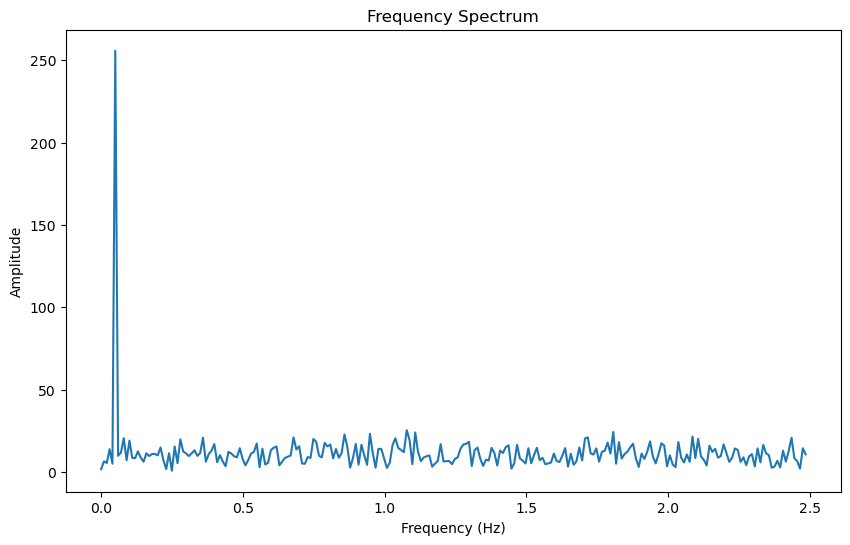

In [46]:
magnitude = np.abs(fft_values)

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


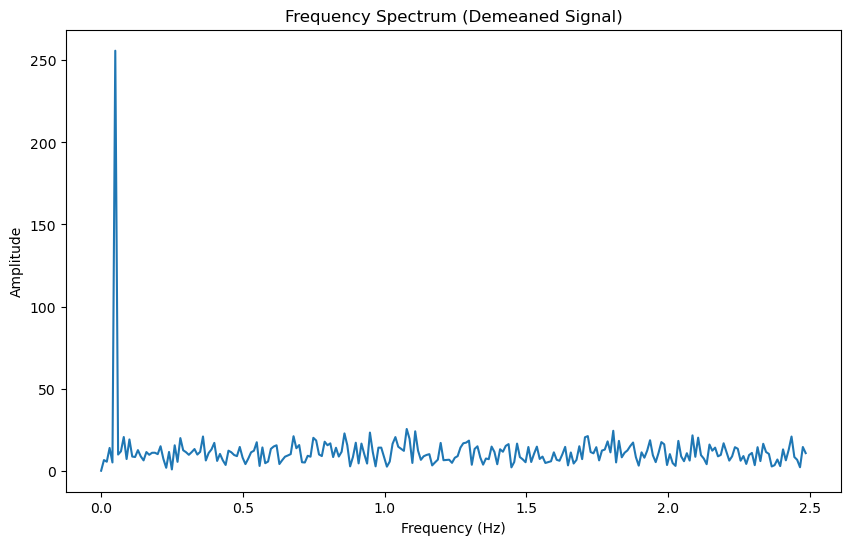

In [48]:
signal_demeaned = signal - np.mean(signal)
fft_values = np.fft.fft(signal_demeaned)

magnitude = np.abs(fft_values)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title('Frequency Spectrum (Demeaned Signal)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()